# Boardgame Dataset- weekly assignments
Laura Brin for CMPT3835-ML WIP II

Loading libraries

In [44]:
#libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

Loading data

In [45]:
df=pd.read_csv('bgg_dataset.csv', delimiter=";")

In [46]:
df["Complexity Average"].replace(to_replace=",",value=".",inplace=True,regex=True)
df["Rating Average"].replace(to_replace=",",value=".",inplace=True,regex=True)
df["Complexity Average"]=df["Complexity Average"].astype(float)
df["Rating Average"]=df["Rating Average"].astype(float)


In [47]:
df.to_csv("bgg_dataset_header.csv")  #to save the file with headers for immport in to online autoML

In [48]:
df.head()

ID                               Name  Year Published  Min Players  \
0  174430.0                         Gloomhaven          2017.0            1   
1  161936.0          Pandemic Legacy: Season 1          2015.0            2   
2  224517.0                  Brass: Birmingham          2018.0            2   
3  167791.0                  Terraforming Mars          2016.0            1   
4  233078.0  Twilight Imperium: Fourth Edition          2017.0            3   

   Max Players  Play Time  Min Age  Users Rated  Rating Average  BGG Rank  \
0            4        120       14        42055            8.79         1   
1            4         60       13        41643            8.61         2   
2            4        120       14        19217            8.66         3   
3            5        120       12        64864            8.43         4   
4            6        480       14        13468            8.70         5   

   Complexity Average  Owned Users  \
0                3.86      68323.0   
1                2.84      65294.0   
2                3.91      28785.0   
3                3.24      87099.0   
4                4.22      16831.0   

                                           Mechanics  \
0  Action Queue, Action Retrieval, Campaign / Bat...   
1  Action Points, Cooperative Game, Hand Manageme...   
2  Hand Management, Income, Loans, Market, Networ...   
3  Card Drafting, Drafting, End Game Bonuses, Han...   
4  Action Drafting, Area Majority / Influence, Ar...   

                          Domains  
0  Strategy Games, Thematic Games  
1  Strategy Games, Thematic Games  
2                  Strategy Games  
3                  Strategy Games  
4  Strategy Games, Thematic Games

In [49]:
df.describe()

ID  Year Published   Min Players   Max Players  \
count   20327.000000    20342.000000  20343.000000  20343.000000   
mean   108216.245142     1984.249877      2.019712      5.672221   
std     98682.097298      214.003181      0.690366     15.231376   
min         1.000000    -3500.000000      0.000000      0.000000   
25%     11029.000000     2001.000000      2.000000      4.000000   
50%     88931.000000     2011.000000      2.000000      4.000000   
75%    192939.500000     2016.000000      2.000000      6.000000   
max    331787.000000     2022.000000     10.000000    999.000000   

          Play Time       Min Age    Users Rated  Rating Average  \
count  20343.000000  20343.000000   20343.000000    20343.000000   
mean      91.294548      9.601485     840.971391        6.403227   
std      545.447203      3.645458    3511.562220        0.935911   
min        0.000000      0.000000      30.000000        1.050000   
25%       30.000000      8.000000      55.000000        5.820000   
50%       45.000000     10.000000     120.000000        6.430000   
75%       90.000000     12.000000     385.000000        7.030000   
max    60000.000000     25.000000  102214.000000        9.580000   

           BGG Rank  Complexity Average    Owned Users  
count  20343.000000        20343.000000   20320.000000  
mean   10172.890429            1.991188    1408.457628  
std     5872.831597            0.848903    5040.179315  
min        1.000000            0.000000       0.000000  
25%     5087.500000            1.330000     146.000000  
50%    10173.000000            1.970000     309.000000  
75%    15258.500000            2.540000     864.000000  
max    20344.000000            5.000000  155312.000000

## EDA and cleaning

In [50]:
df.dtypes

ID                    float64
Name                   object
Year Published        float64
Min Players             int64
Max Players             int64
Play Time               int64
Min Age                 int64
Users Rated             int64
Rating Average        float64
BGG Rank                int64
Complexity Average    float64
Owned Users           float64
Mechanics              object
Domains                object
dtype: object

In [51]:
df.isnull().sum()

ID                       16
Name                      0
Year Published            1
Min Players               0
Max Players               0
Play Time                 0
Min Age                   0
Users Rated               0
Rating Average            0
BGG Rank                  0
Complexity Average        0
Owned Users              23
Mechanics              1598
Domains               10159
dtype: int64

In [52]:
df_games=df.copy()

exploring categories

In [53]:
categorylist=[]
df_games["number_of_mechanics"]=df_games["Mechanics"].str.count(",")+1
for game in df_games["Mechanics"].index:
    list=str(df_games["Mechanics"][game])
    if list is not None:
        new_list=list.split(",")
        for item in new_list:
            item=item.strip()
            if item not in categorylist:
                categorylist.append(item)
    else:
        pass   
print(len(categorylist))     
print(categorylist)

183
['Action Queue', 'Action Retrieval', 'Campaign / Battle Card Driven', 'Card Play Conflict Resolution', 'Communication Limits', 'Cooperative Game', 'Deck Construction', 'Deck Bag and Pool Building', 'Grid Movement', 'Hand Management', 'Hexagon Grid', 'Legacy Game', 'Modular Board', 'Once-Per-Game Abilities', 'Scenario / Mission / Campaign Game', 'Simultaneous Action Selection', 'Solo / Solitaire Game', 'Storytelling', 'Variable Player Powers', 'Action Points', 'Point to Point Movement', 'Set Collection', 'Trading', 'Income', 'Loans', 'Market', 'Network and Route Building', 'Score-and-Reset Game', 'Tech Trees / Tech Tracks', 'Turn Order: Stat-Based', 'Variable Set-up', 'Card Drafting', 'Drafting', 'End Game Bonuses', 'Take That', 'Tile Placement', 'Turn Order: Progressive', 'Action Drafting', 'Area Majority / Influence', 'Area-Impulse', 'Dice Rolling', 'Follow', 'Variable Phase Order', 'Voting', 'Critical Hits and Failures', 'Line of Sight', 'Auction/Bidding', 'Auction: Dutch', 'Even

There are 183 categories-- too many to encode. look at bins or removing feature for models that need encoding <br/>
create categorical mechanics columns?

In [54]:
df_games["mechanics_coded"]=str(df_games["Mechanics"]).replace(",","|")

In [55]:
df_games["number_of_mechanics"].value_counts()

2.0     4714
1.0     4445
3.0     3733
4.0     2408
5.0     1448
6.0      798
7.0      486
8.0      299
9.0      180
10.0     111
11.0      49
12.0      32
13.0      16
16.0       7
14.0       7
17.0       5
15.0       3
18.0       3
19.0       1
Name: number_of_mechanics, dtype: int64

Exploring Domains

In [56]:
domainlist=[]
df_games["number_of_domains"]=df_games["Domains"].str.count(",")+1
for game in df_games["Domains"].index:
    dlist=str(df_games["Domains"][game])
    if dlist is not None:
        new_dlist=dlist.split(",")
        for item in new_dlist:
            item=item.strip()
            if item not in domainlist:
                domainlist.append(item)
    else:
        pass   
print(len(domainlist))     
print(domainlist)

9
['Strategy Games', 'Thematic Games', 'Wargames', 'Family Games', 'Customizable Games', 'Abstract Games', 'Party Games', "Children's Games", 'nan']


There are 9 domain categories. Encode manually

In [57]:
for domain in domainlist:
    df_games[domain]=0


for game in df_games["Domains"].index:
    dlist=str(df_games["Domains"][game])
    new_dlist=dlist.split(",")
    for item in new_dlist:
        type=item.strip()
        df_games[type][game]=1


C:\Users\lbrin\AppData\Local\Temp\ipykernel_26772\1954942492.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games[type][game]=1


In [58]:
domainlist.append("Unknown")
domainlist.remove("nan")
df_games.rename(columns = {"'nan':'Unknown'"}, inplace = True)

TypeError: 'set' object is not callable

In [ ]:
df_games.head()

ID                               Name  Year Published  Min Players  \
0  174430.0                         Gloomhaven          2017.0            1   
1  161936.0          Pandemic Legacy: Season 1          2015.0            2   
2  224517.0                  Brass: Birmingham          2018.0            2   
3  167791.0                  Terraforming Mars          2016.0            1   
4  233078.0  Twilight Imperium: Fourth Edition          2017.0            3   

   Max Players  Play Time  Min Age  Users Rated  Rating Average  BGG Rank  \
0            4        120       14        42055            8.79         1   
1            4         60       13        41643            8.61         2   
2            4        120       14        19217            8.66         3   
3            5        120       12        64864            8.43         4   
4            6        480       14        13468            8.70         5   

   ...  number_of_domains  Strategy Games Thematic Games Wargames  \
0  ...                2.0               1              1        0   
1  ...                2.0               1              1        0   
2  ...                1.0               1              0        0   
3  ...                1.0               1              0        0   
4  ...                2.0               1              1        0   

   Family Games Customizable Games  Abstract Games  Party Games  \
0             0                  0               0            0   
1             0                  0               0            0   
2             0                  0               0            0   
3             0                  0               0            0   
4             0                  0               0            0   

   Children's Games  nan  
0                 0    0  
1                 0    0  
2                 0    0  
3                 0    0  
4                 0    0  

[5 rows x 26 columns]

grouping Year Published

In [ ]:
Game_ages=["Ancient", "Historical","Vintage","Modern"]
df_games["BG Age"]=pd.cut(df_games["Year Published"], bins=[-3500,0,1880,1980,2023], labels=Game_ages)


In [ ]:
#Encode the BG Age
#enc=OneHotEncoder(handle_unknown='ignore')
#df_games["BG Age Category"]=enc.fit(df_games["BG Age"])


Owned Users Null values

In [ ]:
df_games["Owned Users"]=df_games["Owned Users"].fillna(0)

Max players

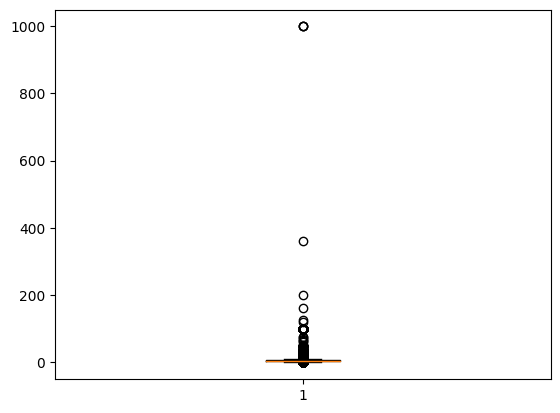

In [ ]:
fig=plt.boxplot(df_games["Max Players"])

In [ ]:
df_games["Max Players"].where(df_games["Max Players"]<20,20,inplace=True)

Max Play Time Outliers

In [ ]:
df_games["Play Time"].where(df_games["Play Time"]<180,180,inplace=True)

In [ ]:
df_games.head()

ID                               Name  Year Published  Min Players  \
0  174430.0                         Gloomhaven          2017.0            1   
1  161936.0          Pandemic Legacy: Season 1          2015.0            2   
2  224517.0                  Brass: Birmingham          2018.0            2   
3  167791.0                  Terraforming Mars          2016.0            1   
4  233078.0  Twilight Imperium: Fourth Edition          2017.0            3   

   Max Players  Play Time  Min Age  Users Rated  Rating Average  BGG Rank  \
0            4        120       14        42055            8.79         1   
1            4         60       13        41643            8.61         2   
2            4        120       14        19217            8.66         3   
3            5        120       12        64864            8.43         4   
4            6        180       14        13468            8.70         5   

   ...  Strategy Games  Thematic Games Wargames Family Games  \
0  ...               1               1        0            0   
1  ...               1               1        0            0   
2  ...               1               0        0            0   
3  ...               1               0        0            0   
4  ...               1               1        0            0   

   Customizable Games Abstract Games  Party Games  Children's Games  nan  \
0                   0              0            0                 0    0   
1                   0              0            0                 0    0   
2                   0              0            0                 0    0   
3                   0              0            0                 0    0   
4                   0              0            0                 0    0   

   BG Age  
0  Modern  
1  Modern  
2  Modern  
3  Modern  
4  Modern  

[5 rows x 27 columns]

In [ ]:
df_games["Min Age"].unique()

array([14, 13, 12, 10, 17, 15,  8, 18, 16, 11,  7,  9,  6,  0,  5,  4,  2,
        3, 21,  1, 25], dtype=int64)

In [ ]:
df_games_clean=df_games.drop(["ID","Mechanics","Year Published","BGG Rank"], axis=1)

Note: <br>
Mechanics not encoded yet, Names not dropped- want to see how AutoML does with series

## AutoEDA

libraries

In [ ]:
import ydata_profiling as pp #pandas profiling
import sweetviz as sv #sweetviz

In [ ]:
pdReport=pp.ProfileReport(df_games_clean)

Notes from EDA: <br>
Need to normalize Owned users once split <br>
Play Time- set maximum <br>

In [ ]:
pdReport

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Spliting Data and Encoding

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
# create the MultiLabelBinarizer object
mlb = MultiLabelBinarizer()

# one-hot encode
Game_ages_enc = pd.DataFrame(mlb.fit_transform(df_games_clean['BG Age']), columns=mlb.classes_, index=df_games_clean.index)

df_games_final = pd.concat([df_games_clean,Game_ages_enc], axis=1)
df_games_final.head()

TypeError: 'float' object is not iterable

In [ ]:
df_games_final.head()

In [ ]:
features=df_games_clean.drop(["Rating Average"],axis=1)
label=df_games_clean["Rating Average"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.25, random_state=42)

normalize features: Users Rated, Users Owned

In [ ]:
MinMaxScaler=MinMaxScaler()





SyntaxError: invalid syntax (277353552.py, line 3)

encode:BG Age

## AutoML

### AutoGluon

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor


In [ ]:
domainlist

['Strategy Games',
 'Thematic Games',
 'Wargames',
 'Family Games',
 'Customizable Games',
 'Abstract Games',
 'Party Games',
 "Children's Games",
 'Unknown']

In [ ]:
save_path = 'agModels-predictClass'  # specifies folder to store trained models
predictor = TabularPredictor(label="Rating Average", path=save_path).fit(X_train,y_train)

AssertionError: tuning_data is required to be a pandas DataFrame, but was instead: <class 'pandas.core.series.Series'>

In [ ]:
y_pred = predictor.predict(X_test)
print("Predictions:  \n", y_pred)
perf = predictor.evaluate_predictions(y_test, y_pred, auxiliary_metrics=False)

In [ ]:
test=X_test.join(y_test)

In [ ]:
predictor.leaderboard(test, silent=True)

In [ ]:
predictor = TabularPredictor(label=<variable-name>).fit(train_data=<file-name>)

In [ ]:
pred_probs = predictor.predict_proba(test_data_nolab)
pred_probs.head(5)

In [ ]:
results = predictor.fit_summary(show_plot=True)

In [ ]:
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor.feature_metadata)

In [ ]:
predictor.leaderboard(test, silent=True)

### TPOT

In [ ]:
from sklearn.model_selection import train_test_split
import tpot as tp
from tpot import TPOTClassifier

In [ ]:
tpot = TPOTClassifier(generations=10, 
                      population_size=16,
                      scoring=None,# YOUR CODE HERE
                      verbosity=2,
                      random_state=42)
tpot.fit(features.values, label.values)
print(f"Tpop score on test data: {tpot.score(features, Label):.2f}")
tpot.export('tpot_titanic.py')

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

ML Flow

In [ ]:
import pipreqs
pipreqs

<module 'pipreqs' from 'c:\\Users\\lbrin\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\pipreqs\\__init__.py'>